In [34]:
import numpy                      as np
import pandas                     as pd
import matplotlib.pyplot          as plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
from   datetime                        import  datetime,timedelta
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from statsmodels.tsa.seasonal     import seasonal_decompose, STL

In [12]:
df = pd.read_csv('train_(1).csv',parse_dates=['Month'],index_col='Month')

In [13]:
df.head()

,Avg_sunspot_count
Month,
1749-01-01,97
1749-02-01,104
1749-03-01,117
1749-04-01,93
1749-05-01,142


In [20]:
df.tail()

,Avg_sunspot_count
Month,
2010-08-01,30
2010-09-01,36
2010-10-01,34
2010-11-01,34
2010-12-01,25


In [21]:
( 2010 - 1748 ) * 12

3144

In [22]:
df.shape

(3144, 1)

In [14]:
df.dtypes

Avg_sunspot_count    int64
dtype: object

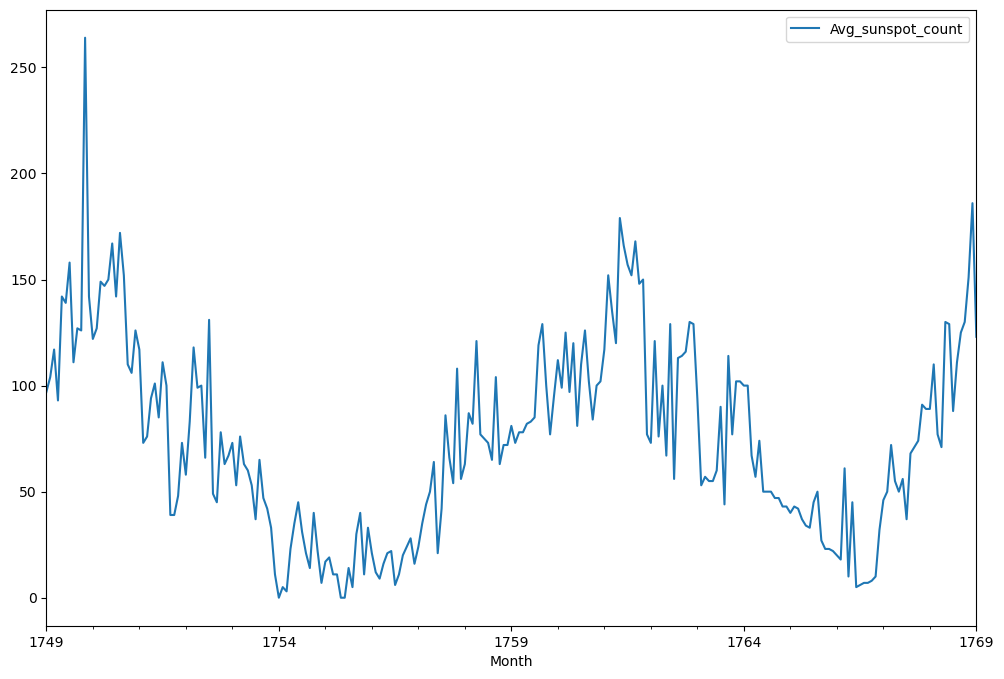

In [18]:
df['1749-01-01':'1769-01-01'].plot(figsize=(12,8))
plt.show()

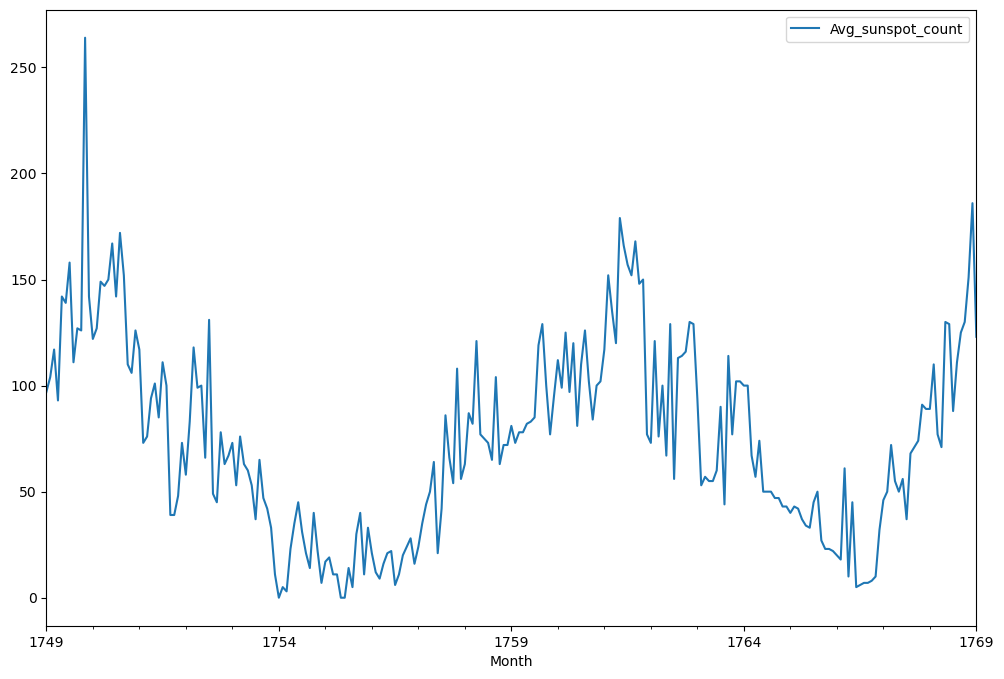

In [24]:
df['1749-01-01':'1769-01-01'].plot(figsize=(12,8))
plt.show()

In [25]:
dfq = df.resample('Q').sum()
dfq

,Avg_sunspot_count
Month,
1749-03-31,318
1749-06-30,374
1749-09-30,396
1749-12-31,532
1750-03-31,398
...,...
2009-12-31,31
2010-03-31,73
2010-06-30,43


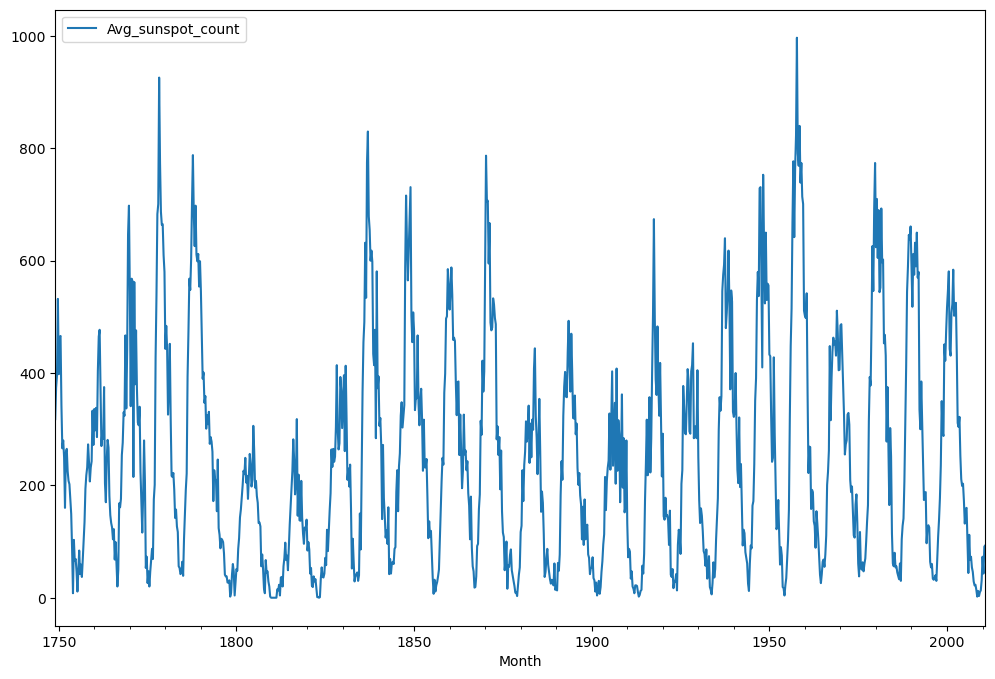

In [26]:
dfq.plot(figsize=(12,8))
plt.show()

In [29]:
train_end=datetime(2000,12,31)
test_end=datetime(2010,12,31)

In [30]:
train             = df[:train_end] 
test              = df[train_end + timedelta(days=1):test_end]

In [31]:
train

,Avg_sunspot_count
Month,
1749-01-01,97
1749-02-01,104
1749-03-01,117
1749-04-01,93
1749-05-01,142
...,...
2000-08-01,181
2000-09-01,156
2000-10-01,142


In [32]:
test

,Avg_sunspot_count
Month,
2001-01-01,143
2001-02-01,122
2001-03-01,166
2001-04-01,162
2001-05-01,142
...,...
2010-08-01,30
2010-09-01,36
2010-10-01,34


In [79]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [80]:
#model_SES_fit1 = model_SES.fit(optimized=True) # Check both ways and check summary below
model_SES_fit1 = model_SES.fit()

In [81]:
model_SES_fit1.summary()

Dep. Variable:,Avg_sunspot_count,No. Observations:,3024
Model:,SimpleExpSmoothing,SSE,2029222.228
Optimized:,True,AIC,19686.694
Trend:,None,BIC,19698.723
Seasonal:,None,AICC,19686.707
Seasonal Periods:,None,Date:,"Sat, 12 Oct 2024"
Box-Cox:,False,Time:,07:13:13
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5213484,alpha,True
initial_level,103.23971,l.0,True


In [82]:
SES_predict1 = model_SES_fit1.forecast(steps=len(test))

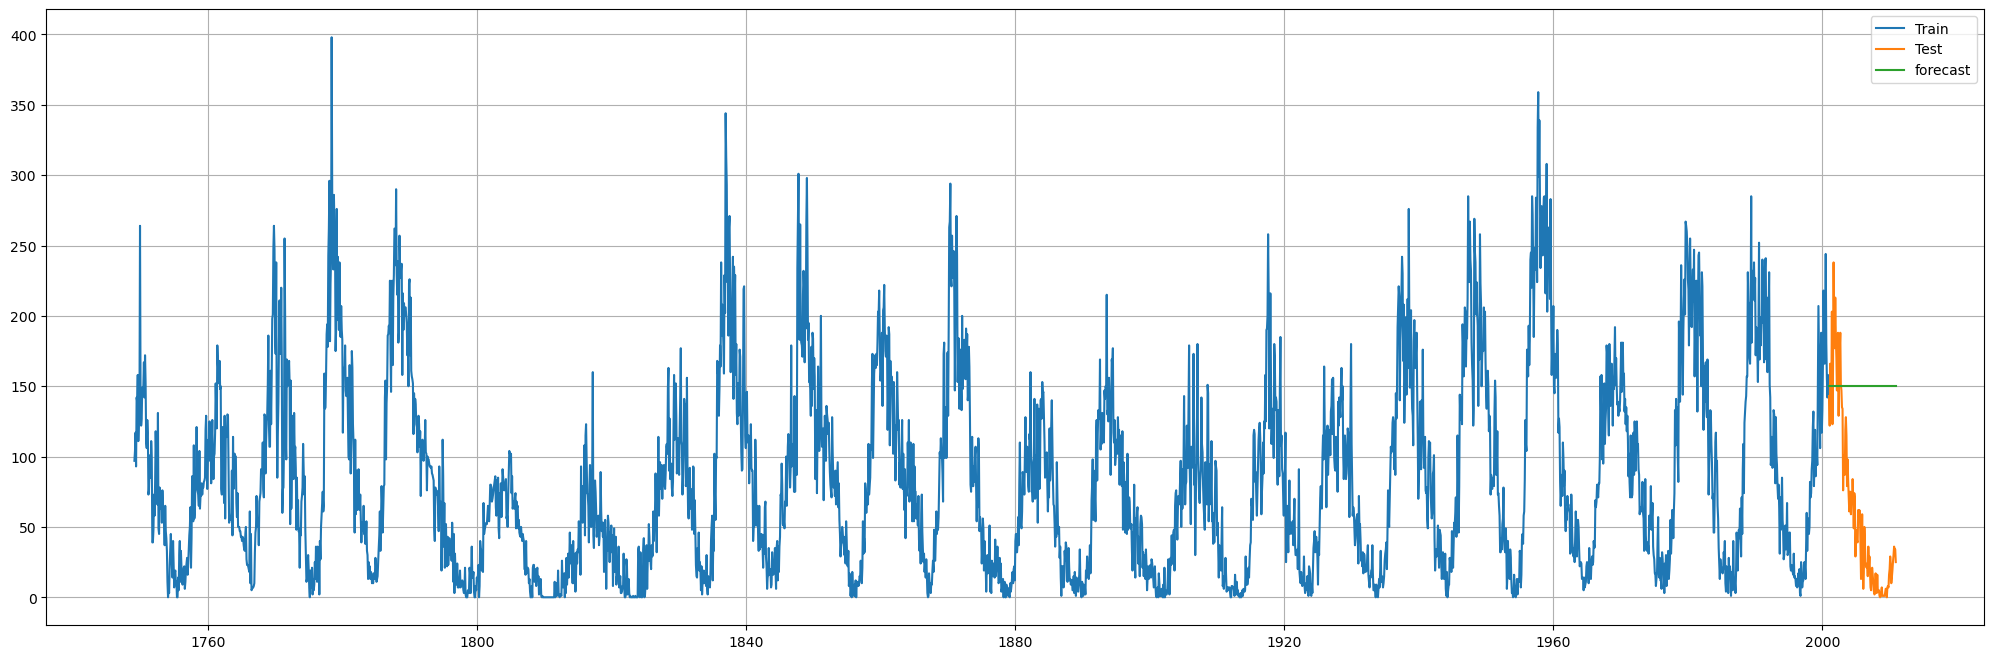

In [83]:
rcParams['figure.figsize'] = 25,8
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict1,label='forecast')

plt.legend(loc='best')
plt.grid()

In [84]:
mean_squared_error(test.values,SES_predict1.values,squared=False)

108.08779096840505

In [71]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [72]:
MAPE(test.values,SES_predict1.values)

inf

## Double Exponential

In [58]:
model_DES = Holt(train, damped_trend=True, initialization_method='estimated')

In [59]:
model_DES_fit1 = model_DES.fit(optimized=True)

In [60]:
model_DES_fit1.summary()

Dep. Variable:,Avg_sunspot_count,No. Observations:,3024
Model:,Holt,SSE,2030581.080
Optimized:,True,AIC,19694.718
Trend:,Additive,BIC,19724.790
Seasonal:,None,AICC,19694.756
Seasonal Periods:,None,Date:,"Sat, 12 Oct 2024"
Box-Cox:,False,Time:,07:09:51
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5132046,alpha,True
smoothing_trend,0.0014909,beta,True


In [61]:
DES_predict1 = model_DES_fit1.forecast(steps=len(test))

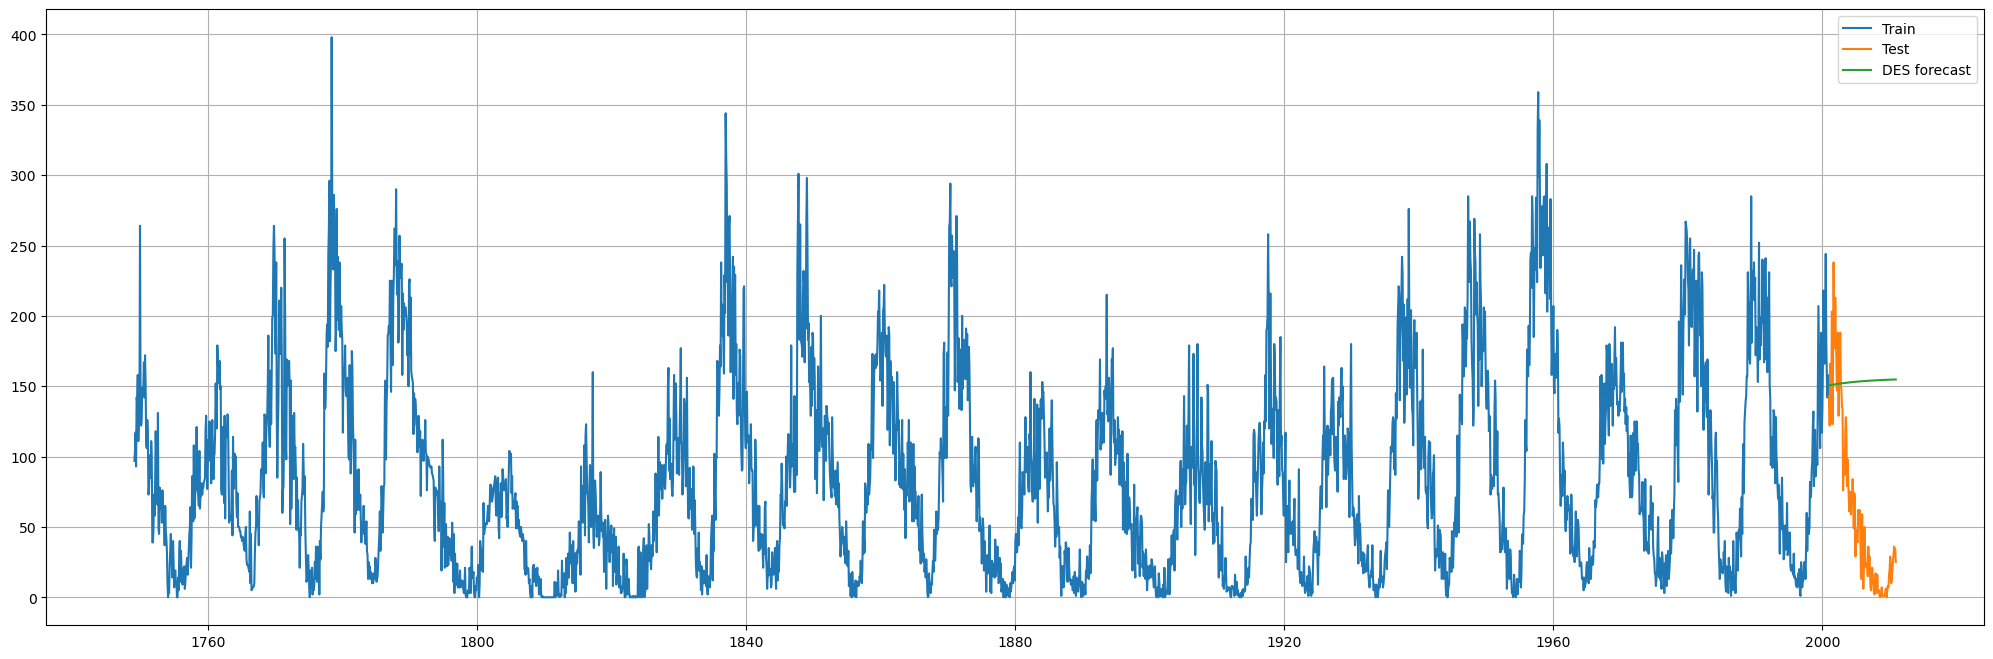

In [62]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(DES_predict1, label='DES forecast')
plt.legend(loc='best')
plt.grid()

In [63]:
mean_squared_error(test.values,DES_predict1.values,squared=False)

111.23714950294246